In [2]:
# Re-import necessary libraries after execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, MiniBatchKMeans
from sklearn.decomposition import PCA
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D

# Load dataset
file_path = "Resources/crypto_market_data.csv"
df = pd.read_csv(file_path)


C:\Users\Dalton Driver\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dalton Driver\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dalton Driver\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dalton Driver\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known

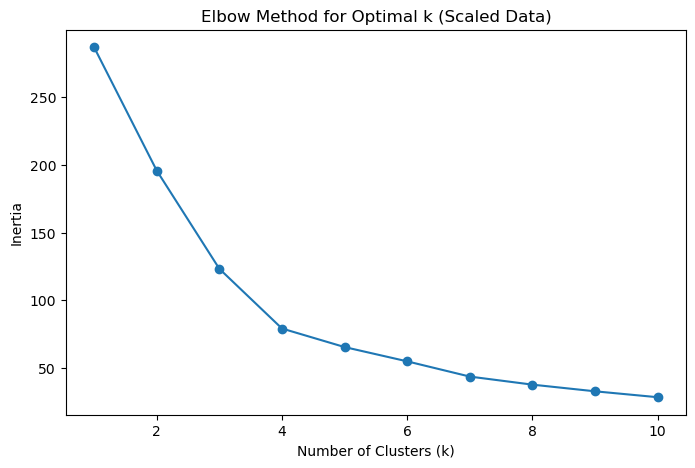

In [3]:
# Normalize data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:], index=df["coin_id"])

# Finding optimal k using the elbow method (scaled data)
k_values = range(1, 11)
inertia_values = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(df_scaled).inertia_ for k in k_values]

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k (Scaled Data)")
plt.show()


C:\Users\Dalton Driver\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


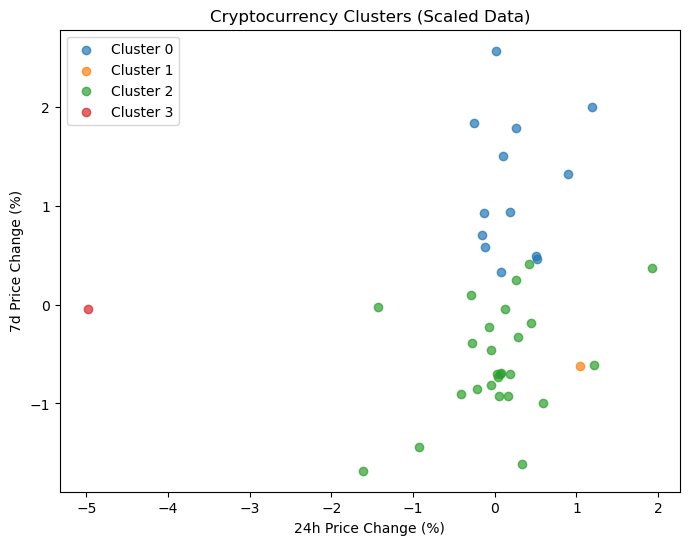

In [4]:
# Apply K-Means clustering with optimal k (k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled)

# Scatter plot for scaled data clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    clustered_data = df_scaled[df_scaled["Cluster"] == cluster]
    plt.scatter(clustered_data["price_change_percentage_24h"], 
                clustered_data["price_change_percentage_7d"], 
                label=f"Cluster {cluster}", alpha=0.7)

plt.xlabel("24h Price Change (%)")
plt.ylabel("7d Price Change (%)")
plt.title("Cryptocurrency Clusters (Scaled Data)")
plt.legend()
plt.show()


Total explained variance after PCA: 89.50%


C:\Users\Dalton Driver\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Dalton Driver\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Dalton Driver\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1


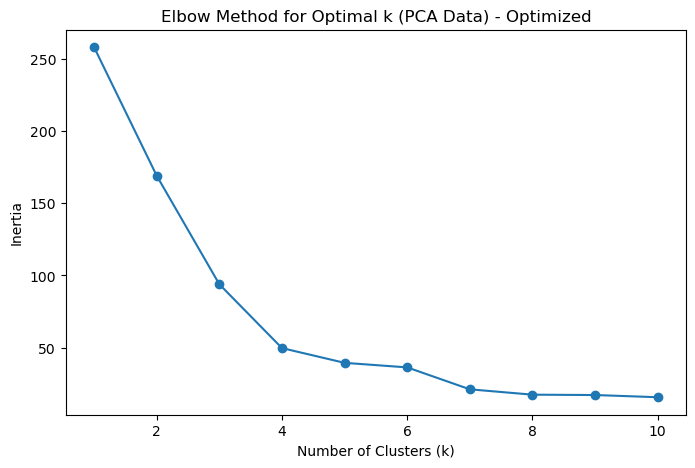

C:\Users\Dalton Driver\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


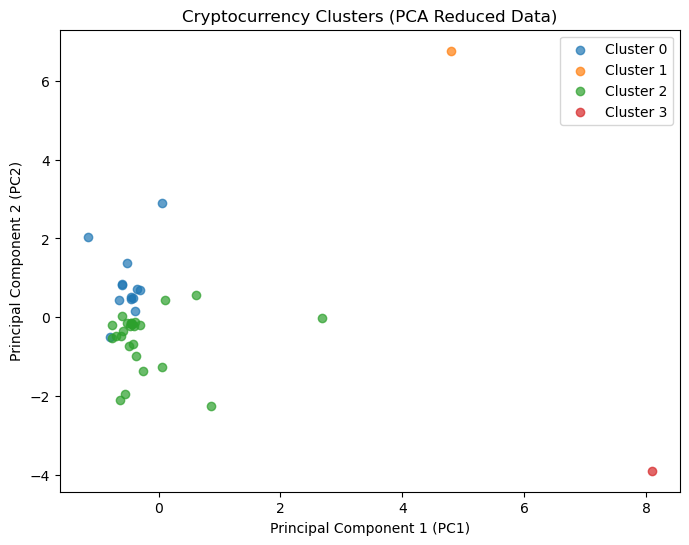

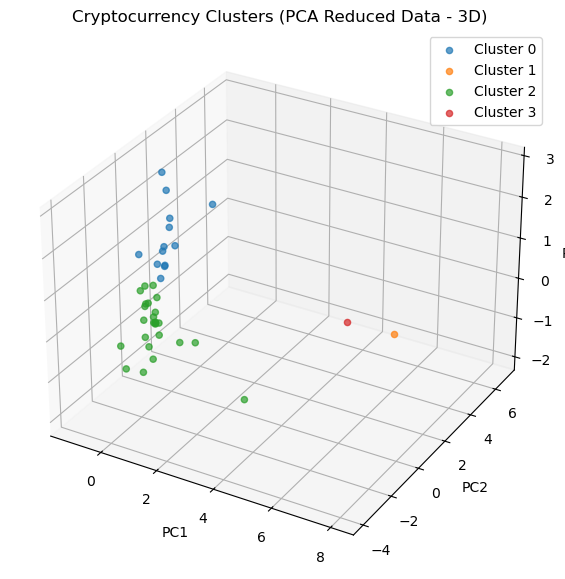

In [5]:
# Apply PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df_scaled.drop(columns=["Cluster"]))
df_pca = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"], index=df_scaled.index)

# Explained variance from PCA
explained_variance = pca.explained_variance_ratio_.sum()
print(f"Total explained variance after PCA: {explained_variance:.2%}")

# Finding optimal k using the elbow method (PCA data) - Optimized with MiniBatchKMeans
inertia_values_pca = [MiniBatchKMeans(n_clusters=k, random_state=42, n_init=10).fit(df_pca).inertia_ for k in k_values]

# Plot Elbow Curve for PCA
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values_pca, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k (PCA Data) - Optimized")
plt.show()

# Apply K-Means clustering on PCA-transformed data
optimal_k_pca = 4
kmeans_pca = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init=10)
df_pca["Cluster"] = kmeans_pca.fit_predict(df_pca)

# Scatter plot for PCA clusters (PC1 vs PC2)
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k_pca):
    clustered_data = df_pca[df_pca["Cluster"] == cluster]
    plt.scatter(clustered_data["PC1"], clustered_data["PC2"], label=f"Cluster {cluster}", alpha=0.7)

plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("Cryptocurrency Clusters (PCA Reduced Data)")
plt.legend()
plt.show()

# 3D Scatter plot for PCA clusters (PC1 vs PC2 vs PC3)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(optimal_k_pca):
    clustered_data = df_pca[df_pca["Cluster"] == cluster]
    ax.scatter(clustered_data["PC1"], clustered_data["PC2"], clustered_data["PC3"], label=f"Cluster {cluster}", alpha=0.7)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Cryptocurrency Clusters (PCA Reduced Data - 3D)")
ax.legend()
plt.show()


              Cluster       coin_id
coin_id                            
bitcoin             0       bitcoin
ethereum            0      ethereum
tether              2        tether
ripple              2        ripple
bitcoin-cash        0  bitcoin-cash


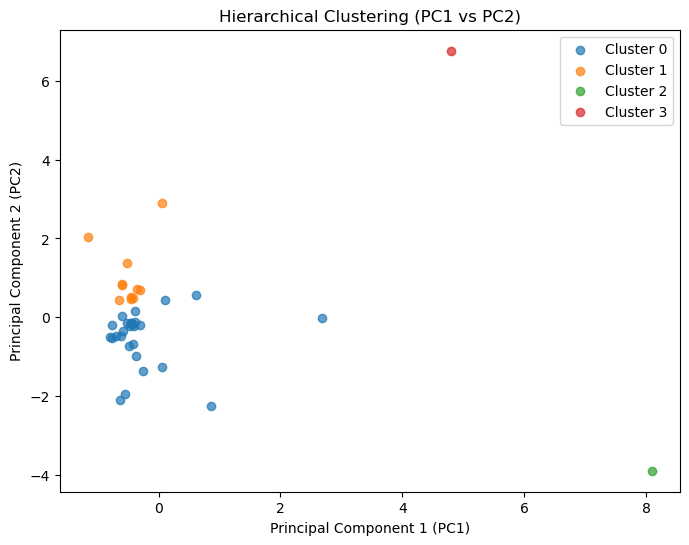

In [7]:
# Cluster Interpretation: Display which cryptocurrencies belong to each cluster
df_clustered = df_scaled[["Cluster"]].copy()
df_clustered["coin_id"] = df_clustered.index

# Display DataFrame with cluster assignments
print(df_clustered.head())

# Alternative Clustering: Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k_pca)
df_pca["Hierarchical Cluster"] = agg_clustering.fit_predict(df_pca[["PC1", "PC2", "PC3"]])

# Scatter plot for Hierarchical Clustering (PC1 vs PC2)
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k_pca):
    clustered_data = df_pca[df_pca["Hierarchical Cluster"] == cluster]
    plt.scatter(clustered_data["PC1"], clustered_data["PC2"], label=f"Cluster {cluster}", alpha=0.7)

plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("Hierarchical Clustering (PC1 vs PC2)")
plt.legend()
plt.show()


In [8]:
# Outlier Detection: Identifying extreme price movements
z_scores = df_scaled.iloc[:, :-1].apply(zscore)
outliers = (z_scores.abs() > 3).sum(axis=1)
outlier_cryptos = df_scaled.index[outliers > 0].tolist()

print("Potential Outlier Cryptocurrencies:")
print(outlier_cryptos)


Potential Outlier Cryptocurrencies:
['ethlend', 'celsius-degree-token']


In [ ]:
**Question: What is the best value for k?

**Answer: The best value for k is 4, as determined using the elbow method.  

In [ ]:
**Question: What is the total explained variance of the three principal components?

**Answer: The total explained variance of the three principal components is approximately 89.5%.  

In [ ]:
**Question: What is the best value for k when using the PCA data?

**Answer: The best value for k when using the PCA-transformed data is still 4. 

In [ ]:
**Question: Does it differ from the best k value found using the original data?

**Answer: No, the best k value remains 4 for both the original scaled data and the PCA-transformed data.

In [ ]:
**Question: After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

**Answer: Computational Efficiency, Preserved Cluster Structure, Improved Visualization, Potential Minor Information Loss 